<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap12/annotation%20/num_of_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap12/annotations/'
os.chdir(folder)
print(os.getcwd()) 
for items in os.listdir(folder):
   print(items)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap12/annotations
via_export_coco.json
50dogs
Untitled0.ipynb


In [0]:
%matplotlib inline
from __future__ import print_function
import sys
import os
from argparse import Namespace

import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from plotnine import *

In [0]:
os.chdir('/content/gdrive/My Drive/school_of_ai/chap12/annotations/50dogs')
with open('/content/gdrive/My Drive/school_of_ai/chap12/annotations/via_export_coco.json') as f:
  data = json.load(f)

In [11]:
images = {img['id']:img for img in data['images'] }
len(images), images[0]

(50,
 {'date_captured': '',
  'file_name': 'n02085782_564.jpg',
  'height': 290,
  'id': 0,
  'license': 1,
  'width': 290})

In [12]:
len(data['annotations']), data['annotations'][0]

(51,
 {'area': 53934,
  'bbox': [53, 13, 202, 267],
  'id': 0,
  'image_id': '0',
  'iscrowd': 0,
  'segmentation': [53, 13, 255, 13, 255, 280, 53, 280]})

In [13]:
output = []
for element in data['annotations']:
  img_detail = {}
  id = int(element['image_id'])
  # print(images[id]['height'])
  height = images[id]['height']
  width = images[id]['width']
  img_detail['file_name'] = images[id]['file_name']
  bb_x, bb_y, bb_width, bb_height = element['bbox']
  
  img_detail['height'] = height
  img_detail['width'] = width
  img_detail['height_norm'] = height/height
  img_detail['width_norm'] = width/width
  img_detail['bb_height_norm'] = bb_height/height
  img_detail['bb_width_norm'] = bb_width/width
  img_detail['bb_x_norm'] = bb_x/width
  img_detail['bb_y_norm'] = bb_y/height
  output.append(img_detail)

len(output), output[0]

(51,
 {'bb_height_norm': 0.9206896551724137,
  'bb_width_norm': 0.696551724137931,
  'bb_x_norm': 0.18275862068965518,
  'bb_y_norm': 0.04482758620689655,
  'file_name': 'n02085782_564.jpg',
  'height': 290,
  'height_norm': 1.0,
  'width': 290,
  'width_norm': 1.0})

In [15]:
df = pd.DataFrame(output)
df.head()

,file_name,height,width,height_norm,width_norm,bb_height_norm,bb_width_norm,bb_x_norm,bb_y_norm
0,n02085782_564.jpg,290,290,1.0,1.0,0.920690,0.696552,0.182759,0.044828
1,n02086240_272.jpg,378,500,1.0,1.0,0.399471,0.580000,0.210000,0.571429
2,n02086646_309.jpg,300,400,1.0,1.0,0.783333,0.507500,0.320000,0.113333
3,n02087394_889.jpg,500,333,1.0,1.0,0.852000,0.831832,0.027027,0.086000
4,n02088094_115.jpg,500,318,1.0,1.0,0.790000,0.641509,0.213836,0.136000


In [23]:
df.shape

(51, 9)

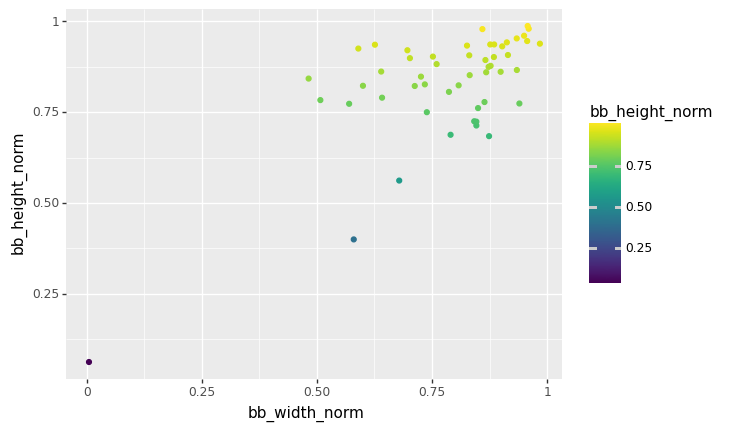

<ggplot: (8742360225789)>

In [22]:
(
        ggplot(data=df)
+geom_point(mapping=aes(x='bb_width_norm', y='bb_height_norm', color='bb_height_norm'))
)

In [18]:
df_k = df[['bb_height_norm','bb_width_norm']]
df_k.head()

,bb_height_norm,bb_width_norm
0,0.920690,0.696552
1,0.399471,0.580000
2,0.783333,0.507500
3,0.852000,0.831832
4,0.790000,0.641509


In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(df_k)
    wcss.append({'k':i, 'inertia':kmeans.inertia_})

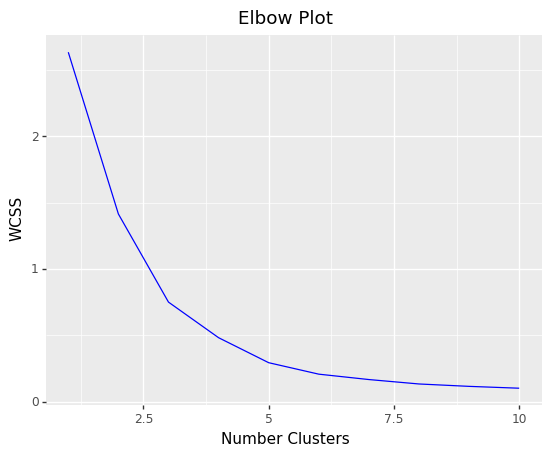

<ggplot: (8742360225775)>

In [20]:
(
  ggplot(data=pd.DataFrame(wcss))
    +geom_line(mapping=aes(x='k', y='inertia'),color="blue")
    +labs(title='Elbow Plot',x = 'Number Clusters', y='WCSS')
)

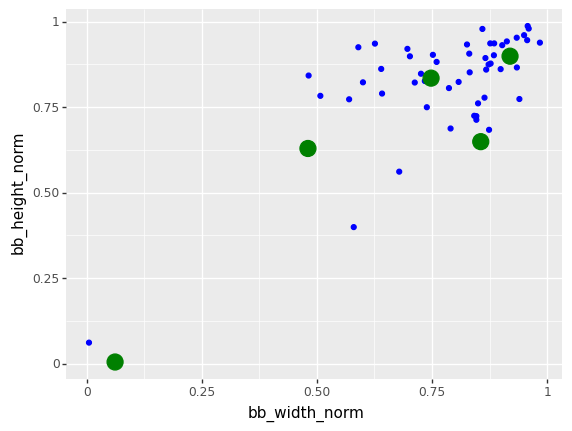

<ggplot: (-9223363294496128673)>

In [21]:
# From the above we choose a cluster of 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(df_k)

(
    ggplot()
    +geom_point(data=df_k,mapping=aes(x='bb_width_norm', y='bb_height_norm'), color="blue")
    +geom_point(data=pd.DataFrame(kmeans.cluster_centers_),mapping=aes(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1]), color="green", size=6)
)